In [2]:
#imports

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib

The below program attempts to simulate an oblique ionosonde sounding. In this simulation, d is the total flight distance of the LFM chirp, dx is the horizontal distance between the two receivers, and h is the virtual height of the reflection point. Curvature of the Earth is ignored, and it is assumed that this transmission is one-way.

In [3]:
#values, set up the sim

fs = 20e6  # sampling rate
N = 1e5  # number of samples

m = 300  # chirp slope
b = 1  # chirp initial (angular) frequency

t = np.arange(N) / float(fs) # make an array out of all samples
w = m * t + b # variable for frequency related to time
tx = np.cos(w * fs * t) # chirp signal
tx[int(len(tx) / 2) :] = 0 # sample over time

dx = 500e3  # m                distance from transmitter
h = 100e3   # m                height above the ground (reflection point)
# maybe account for curvature of the earth later on
d = 2 * np.sqrt(h**2 + (dx/2)**2) # total signal flight distance
c = 3e8  # m/s

delay_s = d / c # delay in seconds (tau), no multiply by 2 since there are separate receivers
delay_samps = int(delay_s * fs) # sample over time

rx = np.roll(tx, delay_samps) # define rx as tx but delayed

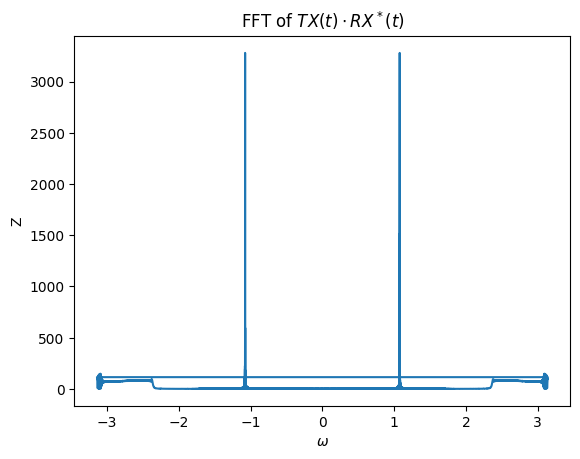

In [4]:
z = tx * np.conj(rx) # multiply tx by the complex conjugate

freq = np.fft.fftfreq(z.shape[-1]) # take fourier transform of tx x rx*
omega = 2 * np.pi * freq # definition of omega
win = np.hanning(len(z)) # hanning window - smooth the values
Z = np.fft.fft(win * z) # take FFT of hanning window

plt.plot(omega, np.abs(Z))
plt.xlabel("$\omega$")
plt.ylabel("Z")
plt.title("FFT of $TX(t) \cdot RX^*(t)$")
plt.show()

In [5]:
w_1 = abs(omega[np.argmax(np.abs(Z))])
tau_est = w_1 / (2 * m)
d_est = c * tau_est
h_est = np.sqrt((d/2)**2 - (dx/2)**2)

h_est

99999.99999999993